In [10]:
# STA2004 Programming assignment3
# Name: Ou Ziyi  Student ID:121090429

# 1.
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
import statsmodels.stats.weightstats

n = 100
pi_zero = 0.5
alpha = 0.05
X = bernoulli.rvs(pi_zero, size = n)

X_bar = sum(X)/n  # calculate the sample mean
pi = 0.5

def variance(sample): # calculate the sample variance
    var_list = []
    for i in range(n):
        var_list.append((X[i] - X_bar)**2)
    return (sum(var_list)/(n-1))

standard_deviation = (variance(X))**0.5

z, p_val = statsmodels.stats.weightstats.ztest(X, value = pi_zero)

print("Z =",z,)
print("p_value = ",p_val)
if p_val >= alpha:  # Hypothesis Testing
    print("Accept H0.")
else:
    print("Reject H0.")
    

def get_p_value(pi_zero,n):
    p_val_list = []
    for i in range(1000):
        X = bernoulli.rvs(pi_zero, size = n)
        z, p_val = statsmodels.stats.weightstats.ztest(X, value = pi_zero)
        p_val_list.append(p_val)
    return p_val_list
count_rejection = 0
p_hat = get_p_value(pi_zero,n)
for i in range(1000):
    if p_hat[i] >= alpha:
        count_rejection = count_rejection
    else:
        count_rejection += 1

print('Repeat process in 1 for 1000 times, we reject H0 for {} times'.format(count_rejection))

Z = 0.5980699588110716
p_value =  0.5497932541747219
Accept H0.
Repeat process in 1 for 1000 times, we reject H0 for 54 times


Text(0.5, 1.0, 'QQ Plot')

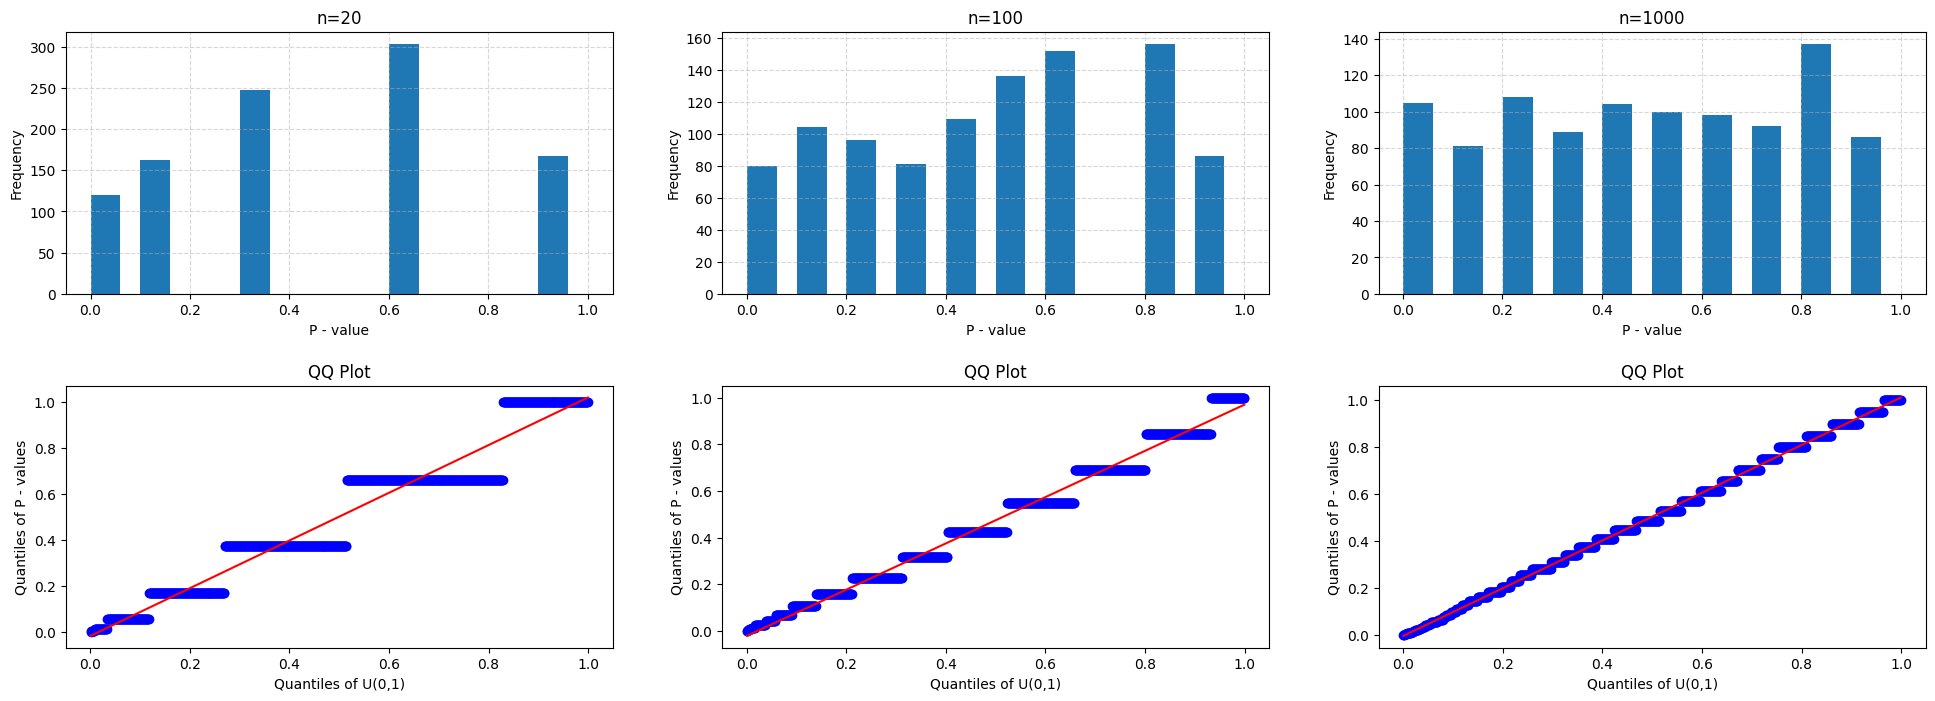

In [16]:
# 2. & 3.
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import bernoulli
import statsmodels.stats.weightstats

def get_p_value(pi_zero,n):
    p_val_list = []
    for i in range(1000):
        X = bernoulli.rvs(pi_zero, size = n)
        z, p_val = statsmodels.stats.weightstats.ztest(X, value = pi_zero)
        p_val_list.append(p_val)
    return p_val_list

n1 = 20
n2 = 100
n3 = 1000
plt.figure(figsize = (24,8))
n = 100
pi_zero = 0.5
alpha = 0.05
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=None,hspace=0.35)


plt.subplot(231)
plt.hist(get_p_value(pi_zero,n1), bins=10, width = 0.06)
plt.xlabel( 'P - value')
plt.ylabel( 'Frequency')
plt.title('n=20')
plt.grid(ls="--",alpha=0.5)

plt.subplot(232)
plt.hist(get_p_value(pi_zero,n2), bins=10, width = 0.06)
plt.xlabel( 'P - value')
plt.ylabel( 'Frequency')
plt.title('n=100')
plt.grid(ls="--",alpha=0.5)

plt.subplot(233)
plt.hist(get_p_value(pi_zero,n3), bins=10, width = 0.06)
plt.xlabel( 'P - value')
plt.ylabel( 'Frequency')
plt.title('n=1000')
plt.grid(ls="--",alpha=0.5)


plt.subplot(234)
nsample = 1000
x1 = get_p_value(pi_zero,n1)
stats.probplot(x1, dist=stats.uniform, plot = plt.subplot(234))
plt.ylabel('Quantiles of P - values')
plt.xlabel('Quantiles of U(0,1)')
plt.title('QQ Plot')

plt.subplot(235)
nsample = 1000
x2 = get_p_value(pi_zero,n2)
stats.probplot(x2, dist=stats.uniform, plot = plt.subplot(235))
plt.ylabel('Quantiles of P - values')
plt.xlabel('Quantiles of U(0,1)')
plt.title('QQ Plot')

plt.subplot(236)
nsample = 1000
x3 = get_p_value(pi_zero,n3)
stats.probplot(x3, dist=stats.uniform, plot = plt.subplot(236))
plt.ylabel('Quantiles of P - values')
plt.xlabel('Quantiles of U(0,1)')
plt.title('QQ Plot')

Type Ⅱ error is monotonically decreasing with pi_zero
Because when True pi increases, the bias (True pi - pi_zero) increases too, so the test statistics will be more likely to fall into the rejection region. Therefore the Type error will decreases.


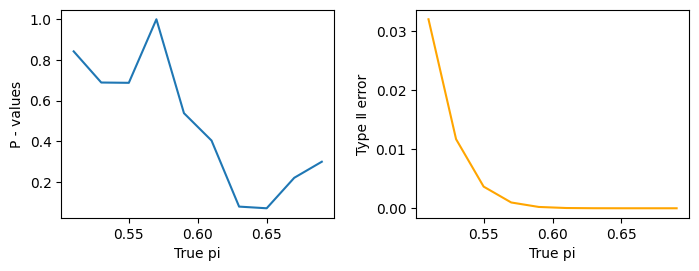

In [9]:
# 4.
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli
import statsmodels.stats.weightstats
from scipy.stats import norm


pi = np.arange(0.51,0.7,0.02)

n = 100
alpha = 0.05
X_list = []
X_bar_list = []
sigma_list = []

def standard_deviation(sample): # calculate the sample variance
    var_list = []
    for i in range(n):
        var_list.append((X[i] - X_bar)**2)
    return (sum(var_list)/(n-1))**0.5

for i in range(10):
    X = bernoulli.rvs(pi[i], size = n)
    X_list.append(X)
    X_bar = sum(X)/n
    X_bar_list.append(X_bar)
for i in range(10):
    sigma_list.append(standard_deviation(X_list[i]))

    
p_val_list = []
for i in range(10):
    z, p_val = statsmodels.stats.weightstats.ztest(X_list[i], value = pi[i])
    p_val_list.append(p_val)
    
z_alpha = norm.isf(q=0.05, loc=0, scale=1) # get the quantile
beta_list = []
for i in range(10):
    beta=1-norm.cdf(z_alpha-(10*(0.5-pi[i])/sigma_list[i]),loc=0,scale=1)
    beta_list.append(beta)

plt.figure(figsize = (8.1,2.7))
plt.subplots_adjust(left=None,bottom=None,right=None,top=None,wspace=0.3,hspace=0.3)

plt.subplot(121)
plt.plot(pi,p_val_list)
plt.xlabel('True pi')
plt.ylabel('P - values')

plt.subplot(122)
plt.plot(pi,beta_list, color = 'orange')
plt.xlabel('True pi')
plt.ylabel('Type Ⅱ error')

print('Type Ⅱ error is monotonically decreasing with pi_zero')
print('Because when True pi increases, the bias (True pi - pi_zero) increases too, so the test statistics will be more likely to fall into the rejection region. Therefore the Type error will decreases.')